In [1]:
import numpy as np

# Define the parameters
alpha = complex(1, 2)  # example value for alpha
beta = complex(3, 4)   # example value for beta
gamma = complex(5, 6)  # example value for gamma
delta = complex(7, 8)  # example value for delta

b = 5   # example value for b
eta = 0.01 # example value for eta

# Define the elements of the 2x2 block matrices
rho_11 = np.abs(alpha)**2 + np.abs(gamma)**2
rho_12 = alpha * np.conj(beta) + gamma * np.conj(delta)
rho_21 = np.conj(alpha) * beta + np.conj(delta) * gamma
rho_22 = np.abs(beta)**2 + np.abs(delta)**2

# Construct the 2x2 blocks
block1 = np.array([[rho_11, rho_12], [rho_21, rho_22]])

# Construct the rho matrix
rho = np.block([
    [(1 - b) * block1, np.zeros((2, 2))],
    [np.zeros((2, 2)), b * block1]
])

# Construct the rho_p matrix
rho_p = np.array([
    [np.abs(alpha)**2, alpha * np.conj(beta), alpha * np.conj(gamma), alpha * np.conj(delta)],
    [beta * np.conj(alpha), np.abs(beta)**2, beta * np.conj(gamma), beta * np.conj(delta)],
    [gamma * np.conj(alpha), gamma * np.conj(beta), np.abs(gamma)**2, gamma * np.conj(delta)],
    [delta * np.conj(alpha), delta * np.conj(beta), delta * np.conj(gamma), np.abs(delta)**2]
])

# Calculate rho_one
rho_one = (1 - eta) * rho + eta * rho_p

# Print the results
print("rho =")
print(rho)
print("\nrho_one =")
print(rho_one)


rho =
[[33.+0.j 47.+0.j  0.+0.j  0.+0.j]
 [47.+0.j 69.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j 33.+0.j 47.+0.j]
 [ 0.+0.j  0.+0.j 47.+0.j 69.+0.j]]

rho_one =
[[24.6+0.j  36.2+0.6j  5.1+1.2j  6.9+1.8j]
 [36.2-0.6j 55.8+0.j  11.7+0.6j 15.9+1.2j]
 [ 5.1-1.2j 11.7-0.6j 41.4+0.j  57.8+0.6j]
 [ 6.9-1.8j 15.9-1.2j 57.8-0.6j 82.2+0.j ]]


In [15]:
pip install qutip numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, wigner, plot_wigner

(1+0j)


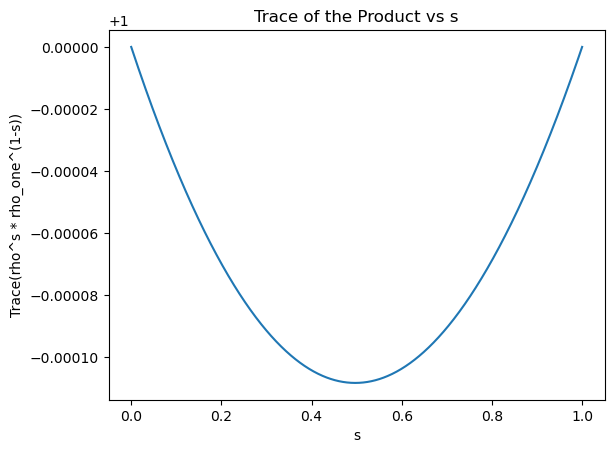

0.9998916786907025


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
alpha = complex(0.991, 0)
beta = complex(0.00, 0)
gamma = complex(0.0, 0)
delta = complex(0.01, 0)

b = 0.9 # Example value for b
eta = 0.01 # Example value for eta

# Define the elements of the 2x2 block matrices
rho_11 = np.abs(alpha)**2 + np.abs(gamma)**2
rho_12 = alpha * np.conj(beta) + gamma * np.conj(delta)
rho_21 = np.conj(alpha) * beta + np.conj(delta) * gamma
rho_22 = np.abs(beta)**2 + np.abs(delta)**2

# Construct the 2x2 blocks
block1 = np.array([[rho_11, rho_12], [rho_21, rho_22]])

# Construct the rho matrix
rho = np.block([
    [(1 - b) * block1, np.zeros((2, 2))],
    [np.zeros((2, 2)), b * block1]
])

# Normalize rho
#print(np.trace(rho))
rho /= np.trace(rho)

# Construct the rho_p matrix
rho_p = np.array([
    [np.abs(alpha)**2, alpha * np.conj(beta), alpha * np.conj(gamma), alpha * np.conj(delta)],
    [beta * np.conj(alpha), np.abs(beta)**2, beta * np.conj(gamma), beta * np.conj(delta)],
    [gamma * np.conj(alpha), gamma * np.conj(beta), np.abs(gamma)**2, gamma * np.conj(delta)],
    [delta * np.conj(alpha), delta * np.conj(beta), delta * np.conj(gamma), np.abs(delta)**2]
])


# Normalize rho_p
#print(np.trace(rho_p))
rho_p /= np.trace(rho_p)

# Calculate rho_one
rho_one = (1 - eta) * rho + eta * rho_p
print(np.trace(rho_one))

# Normalize rho_one
rho_one /= np.trace(rho_one)

# Function to compute the fractional power of a matrix with handling for non-positive eigenvalues
def matrix_fractional_power(matrix, power):
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    eigenvalues_powered = np.diag(np.power(np.abs(eigenvalues), power) * np.sign(eigenvalues))
    return eigenvectors @ eigenvalues_powered @ np.linalg.inv(eigenvectors)

# Calculate rho^s and rho_one^(1-s) for s in linspace(0,1,1000)
s_values = np.linspace(0, 1, 1000)
trace_values = []

for s in s_values:
    rho_s = matrix_fractional_power(rho, s)
    rho_one_1_s = matrix_fractional_power(rho_one, 1 - s)
    product = np.dot(rho_s, rho_one_1_s)
    trace = np.trace(product)
    trace_values.append(trace.real)

# Plot trace vs s
plt.plot(s_values, trace_values)
plt.xlabel('s')
plt.ylabel('Trace(rho^s * rho_one^(1-s))')
plt.title('Trace of the Product vs s')
plt.show()
print(np.min(trace_values))

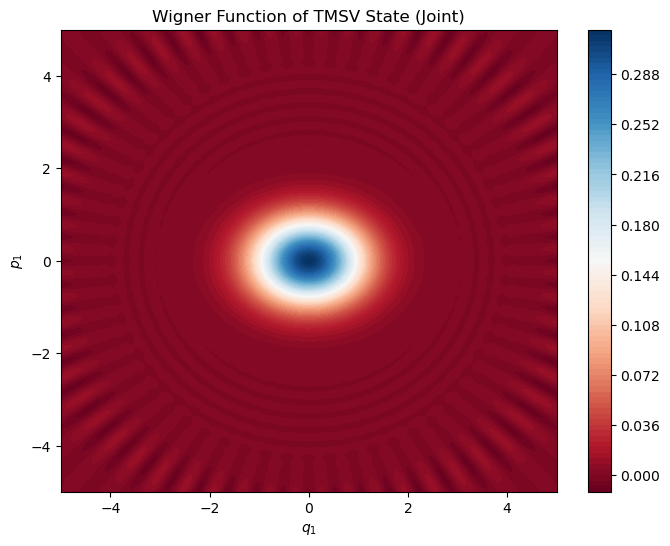

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

mean_photon_number = 0.01
squeezing_parameter = np.arcsinh(np.sqrt(mean_photon_number))

N = 30
vac = tensor(basis(N, 0), basis(N, 0))

# Create the squeezing operators for both modes
squeeze_op1 = squeeze(N, squeezing_parameter)
squeeze_op2 = squeeze(N, -squeezing_parameter)

# Apply the squeezing operators to the vacuum state
tmsv = tensor(squeeze_op1, squeeze_op2) * vac

# Generate the Wigner function for the joint state
xvec = np.linspace(-5, 5, 200)
W = wigner(tmsv, xvec, xvec)

plt.figure(figsize=(8, 6))
plt.contourf(xvec, xvec, W, 100, cmap='RdBu')
plt.colorbar()
plt.title("Wigner Function of TMSV State (Joint)")
plt.xlabel(r"$q_1$")
plt.ylabel(r"$p_1$")
plt.show()


(1+0j)


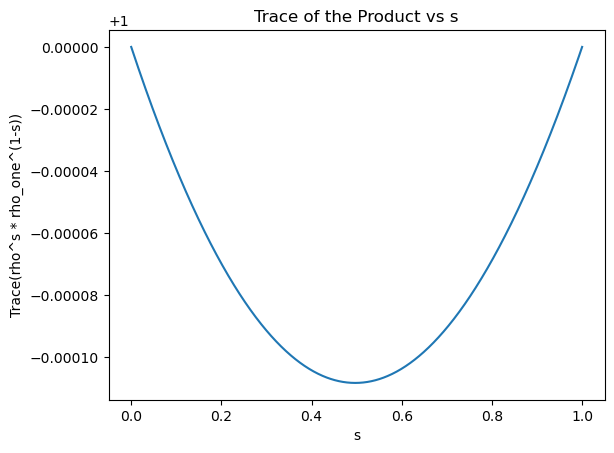

0.9998917541769128


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
alpha = complex(1, 0)
beta = complex(0, 0)
gamma = complex(0, 0)
delta = complex(0, 0)

b = 0.9  # Example value for b
eta = 0.01 # Example value for eta

# Define the elements of the 2x2 block matrices
rho_11 = np.abs(alpha)**2 + np.abs(gamma)**2
rho_12 = alpha * np.conj(beta) + gamma * np.conj(delta)
rho_21 = np.conj(alpha) * beta + np.conj(delta) * gamma
rho_22 = np.abs(beta)**2 + np.abs(delta)**2

# Construct the 2x2 blocks
block1 = np.array([[rho_11, rho_12], [rho_21, rho_22]])

# Construct the rho matrix
rho = np.block([
    [(1 - b) * block1, np.zeros((2, 2))],
    [np.zeros((2, 2)), b * block1]
])

# Normalize rho
#print(np.trace(rho))
rho /= np.trace(rho)

# Construct the rho_p matrix
rho_p = np.array([
    [np.abs(alpha)**2, alpha * np.conj(beta), alpha * np.conj(gamma), alpha * np.conj(delta)],
    [beta * np.conj(alpha), np.abs(beta)**2, beta * np.conj(gamma), beta * np.conj(delta)],
    [gamma * np.conj(alpha), gamma * np.conj(beta), np.abs(gamma)**2, gamma * np.conj(delta)],
    [delta * np.conj(alpha), delta * np.conj(beta), delta * np.conj(gamma), np.abs(delta)**2]
])

# Normalize rho_p
#print(np.trace(rho_p))
rho_p /= np.trace(rho_p)

# Calculate rho_one
rho_one = (1 - eta) * rho + eta * rho_p
print(np.trace(rho_one))

# Normalize rho_one
rho_one /= np.trace(rho_one)

# Function to compute the fractional power of a matrix with handling for non-positive eigenvalues
def matrix_fractional_power(matrix, power):
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    eigenvalues_powered = np.diag(np.power(np.abs(eigenvalues), power) * np.sign(eigenvalues))
    return eigenvectors @ eigenvalues_powered @ np.linalg.inv(eigenvectors)

# Calculate rho^s and rho_one^(1-s) for s in linspace(0,1,1000)
s_values = np.linspace(0, 1, 1000)
trace_values = []

for s in s_values:
    rho_s = matrix_fractional_power(rho, s)
    rho_one_1_s = matrix_fractional_power(rho_one, 1 - s)
    product = np.dot(rho_s, rho_one_1_s)
    trace = np.trace(product)
    trace_values.append(trace.real)

# Plot trace vs s
plt.plot(s_values, trace_values)
plt.xlabel('s')
plt.ylabel('Trace(rho^s * rho_one^(1-s))')
plt.title('Trace of the Product vs s')
plt.show()
print(np.min(trace_values))

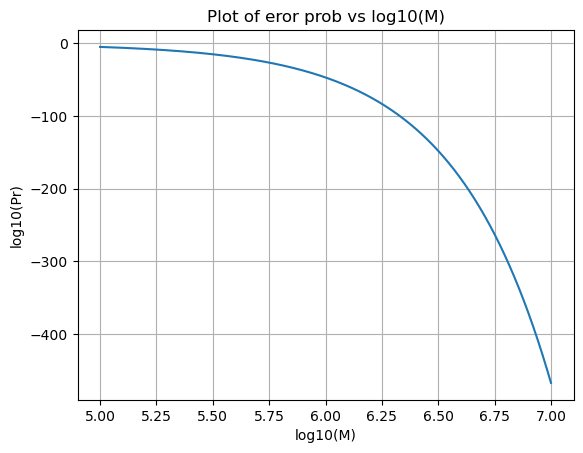

In [30]:
import numpy as np
import matplotlib.pyplot as plt

log10_M_values = np.linspace(5, 7, 5000)
M_values = 10 ** log10_M_values
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10(0.9998923939686131)
result = log10_0_5 + M_values * log10_0_992

plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of eror prob vs log10(M)')
plt.grid(True)
plt.show()


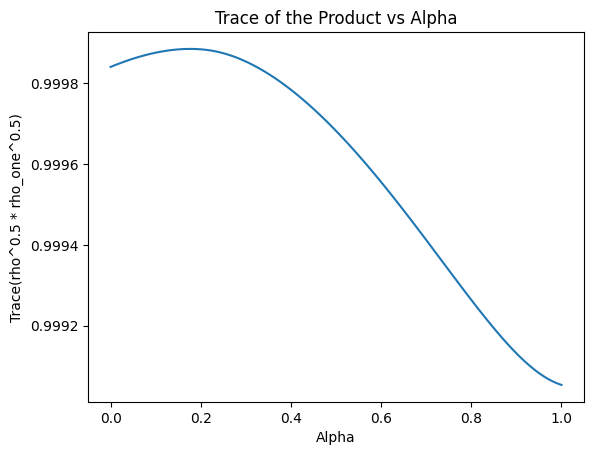

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize parameters
def normalize_params(alpha, beta, gamma, delta):
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2 + np.abs(gamma)**2 + np.abs(delta)**2)
    return alpha / norm, beta / norm, gamma / norm, delta / norm

# Define parameters
beta = complex(0.0545, 0)
gamma = complex(0.0545, 0)
delta = complex(0.0990, 0)

b = 0.9  # Example value for b
eta = 0.03 # Example value for eta

# Initialize list for trace values
trace_values_alpha = []

# Vary alpha from 0 to 1
alpha_values = np.linspace(0, 1, 100)

for alpha_real in alpha_values:
    alpha = complex(alpha_real, 0)

    # Normalize parameters
    alpha, beta, gamma, delta = normalize_params(alpha, beta, gamma, delta)

    # Define the elements of the 2x2 block matrices
    rho_11 = np.abs(alpha)**2 + np.abs(gamma)**2
    rho_12 = alpha * np.conj(beta) + delta * np.conj(gamma)
    rho_21 = np.conj(alpha) * beta + np.conj(delta) * gamma
    rho_22 = np.abs(beta)**2 + np.abs(delta)**2

    # Construct the 2x2 blocks
    block1 = np.array([[rho_11, rho_12], [rho_21, rho_22]])

    # Construct the rho matrix
    rho = np.block([
        [(1 - b) * block1, np.zeros((2, 2))],
        [np.zeros((2, 2)), b * block1]
    ])

    # Normalize rho
    rho /= np.trace(rho)

    # Construct the rho_p matrix
    rho_p = np.array([
        [np.abs(alpha)**2, alpha * np.conj(beta), alpha * np.conj(gamma), alpha * np.conj(delta)],
        [beta * np.conj(alpha), np.abs(beta)**2, beta * np.conj(gamma), beta * np.conj(delta)],
        [gamma * np.conj(alpha), gamma * np.conj(beta), np.abs(gamma)**2, gamma * np.conj(delta)],
        [delta * np.conj(alpha), delta * np.conj(beta), delta * np.conj(gamma), np.abs(delta)**2]
    ])

    # Normalize rho_p
    rho_p /= np.trace(rho_p)

    # Calculate rho_one
    rho_one = (1 - eta) * rho + eta * rho_p

    # Normalize rho_one
    rho_one /= np.trace(rho_one)

    # Function to compute the fractional power of a matrix with handling for non-positive eigenvalues
    def matrix_fractional_power(matrix, power):
        eigenvalues, eigenvectors = np.linalg.eigh(matrix)
        eigenvalues_powered = np.diag(np.power(np.abs(eigenvalues), power) * np.sign(eigenvalues))
        return eigenvectors @ eigenvalues_powered @ np.linalg.inv(eigenvectors)

    # Calculate rho^0.5 and rho_one^0.5
    rho_s = matrix_fractional_power(rho, 0.5)
    rho_one_1_s = matrix_fractional_power(rho_one, 0.5)
    product = np.dot(rho_s, rho_one_1_s)
    trace = np.trace(product)
    trace_values_alpha.append(trace.real)

# Plot trace vs alpha
plt.plot(alpha_values, trace_values_alpha)
plt.xlabel('Alpha')
plt.ylabel('Trace(rho^0.5 * rho_one^0.5)')
plt.title('Trace of the Product vs Alpha')
plt.show()


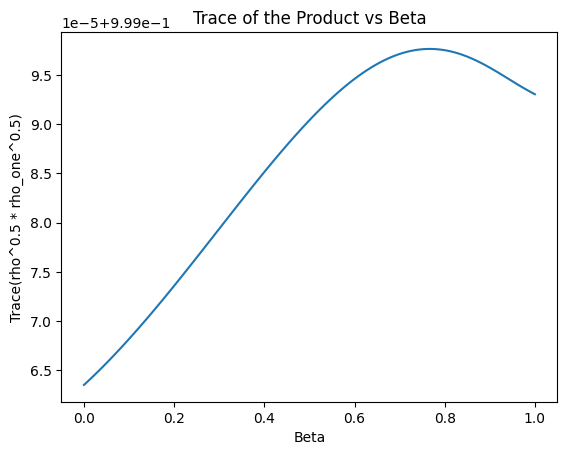

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize parameters
def normalize_params(alpha, beta, gamma, delta):
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2 + np.abs(gamma)**2 + np.abs(delta)**2)
    return alpha / norm, beta / norm, gamma / norm, delta / norm

# Define parameters
alpha = complex(0.9901, 0)
gamma = complex(0.0545, 0)
delta = complex(0.0990, 0)

b = 0.9  # Example value for b
eta = 0.03 # Example value for eta

# Initialize list for trace values
trace_values_beta = []

# Vary beta from 0 to 1
beta_values = np.linspace(0, 1, 100)

for beta_real in beta_values:
    beta = complex(beta_real, 0)

    # Normalize parameters
    alpha, beta, gamma, delta = normalize_params(alpha, beta, gamma, delta)

    # Define the elements of the 2x2 block matrices
    rho_11 = np.abs(alpha)**2 + np.abs(gamma)**2
    rho_12 = alpha * np.conj(beta) + delta * np.conj(gamma)
    rho_21 = np.conj(alpha) * beta + np.conj(delta) * gamma
    rho_22 = np.abs(beta)**2 + np.abs(delta)**2

    # Construct the 2x2 blocks
    block1 = np.array([[rho_11, rho_12], [rho_21, rho_22]])

    # Construct the rho matrix
    rho = np.block([
        [(1 - b) * block1, np.zeros((2, 2))],
        [np.zeros((2, 2)), b * block1]
    ])

    # Normalize rho
    rho /= np.trace(rho)

    # Construct the rho_p matrix
    rho_p = np.array([
        [np.abs(alpha)**2, alpha * np.conj(beta), alpha * np.conj(gamma), alpha * np.conj(delta)],
        [beta * np.conj(alpha), np.abs(beta)**2, beta * np.conj(gamma), beta * np.conj(delta)],
        [gamma * np.conj(alpha), gamma * np.conj(beta), np.abs(gamma)**2, gamma * np.conj(delta)],
        [delta * np.conj(alpha), delta * np.conj(beta), delta * np.conj(gamma), np.abs(delta)**2]
    ])

    # Normalize rho_p
    rho_p /= np.trace(rho_p)

    # Calculate rho_one
    rho_one = (1 - eta) * rho + eta * rho_p

    # Normalize rho_one
    rho_one /= np.trace(rho_one)

    # Function to compute the fractional power of a matrix with handling for non-positive eigenvalues
    def matrix_fractional_power(matrix, power):
        eigenvalues, eigenvectors = np.linalg.eigh(matrix)
        eigenvalues_powered = np.diag(np.power(np.abs(eigenvalues), power) * np.sign(eigenvalues))
        return eigenvectors @ eigenvalues_powered @ np.linalg.inv(eigenvectors)

    # Calculate rho^0.5 and rho_one^0.5
    rho_s = matrix_fractional_power(rho, 0.5)
    rho_one_1_s = matrix_fractional_power(rho_one, 0.5)
    product = np.dot(rho_s, rho_one_1_s)
    trace = np.trace(product)
    trace_values_beta.append(trace.real)

# Plot trace vs beta
plt.plot(beta_values, trace_values_beta)
plt.xlabel('Beta')
plt.ylabel('Trace(rho^0.5 * rho_one^0.5)')
plt.title('Trace of the Product vs Beta')
plt.show()


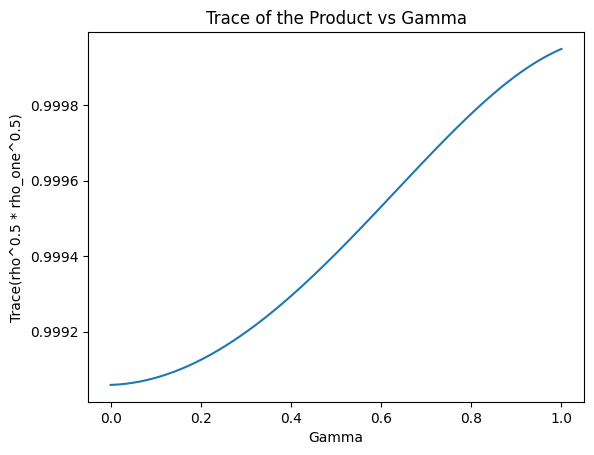

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize parameters
def normalize_params(alpha, beta, gamma, delta):
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2 + np.abs(gamma)**2 + np.abs(delta)**2)
    return alpha / norm, beta / norm, gamma / norm, delta / norm

# Define parameters
alpha = complex(0.9901, 0)
beta = complex(0.0545, 0)
delta = complex(0.0990, 0)

b = 0.9  # Example value for b
eta = 0.03 # Example value for eta

# Initialize list for trace values
trace_values_gamma = []

# Vary gamma from 0 to 1
gamma_values = np.linspace(0, 1, 100)

for gamma_real in gamma_values:
    gamma = complex(gamma_real, 0)

    # Normalize parameters
    alpha, beta, gamma, delta = normalize_params(alpha, beta, gamma, delta)

    # Define the elements of the 2x2 block matrices
    rho_11 = np.abs(alpha)**2 + np.abs(gamma)**2
    rho_12 = alpha * np.conj(beta) + delta * np.conj(gamma)
    rho_21 = np.conj(alpha) * beta + np.conj(delta) * gamma
    rho_22 = np.abs(beta)**2 + np.abs(delta)**2

    # Construct the 2x2 blocks
    block1 = np.array([[rho_11, rho_12], [rho_21, rho_22]])

    # Construct the rho matrix
    rho = np.block([
        [(1 - b) * block1, np.zeros((2, 2))],
        [np.zeros((2, 2)), b * block1]
    ])

    # Normalize rho
    rho /= np.trace(rho)

    # Construct the rho_p matrix
    rho_p = np.array([
        [np.abs(alpha)**2, alpha * np.conj(beta), alpha * np.conj(gamma), alpha * np.conj(delta)],
        [beta * np.conj(alpha), np.abs(beta)**2, beta * np.conj(gamma), beta * np.conj(delta)],
        [gamma * np.conj(alpha), gamma * np.conj(beta), np.abs(gamma)**2, gamma * np.conj(delta)],
        [delta * np.conj(alpha), delta * np.conj(beta), delta * np.conj(gamma), np.abs(delta)**2]
    ])

    # Normalize rho_p
    rho_p /= np.trace(rho_p)

    # Calculate rho_one
    rho_one = (1 - eta) * rho + eta * rho_p

    # Normalize rho_one
    rho_one /= np.trace(rho_one)

    # Function to compute the fractional power of a matrix with handling for non-positive eigenvalues
    def matrix_fractional_power(matrix, power):
        eigenvalues, eigenvectors = np.linalg.eigh(matrix)
        eigenvalues_powered = np.diag(np.power(np.abs(eigenvalues), power) * np.sign(eigenvalues))
        return eigenvectors @ eigenvalues_powered @ np.linalg.inv(eigenvectors)

    # Calculate rho^0.5 and rho_one^0.5
    rho_s = matrix_fractional_power(rho, 0.5)
    rho_one_1_s = matrix_fractional_power(rho_one, 0.5)
    product = np.dot(rho_s, rho_one_1_s)
    trace = np.trace(product)
    trace_values_gamma.append(trace.real)

# Plot trace vs gamma
plt.plot(gamma_values, trace_values_gamma)
plt.xlabel('Gamma')
plt.ylabel('Trace(rho^0.5 * rho_one^0.5)')
plt.title('Trace of the Product vs Gamma')
plt.show()


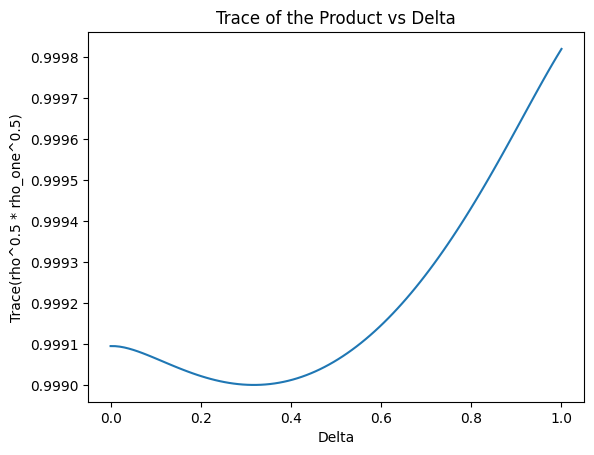

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize parameters
def normalize_params(alpha, beta, gamma, delta):
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2 + np.abs(gamma)**2 + np.abs(delta)**2)
    return alpha / norm, beta / norm, gamma / norm, delta / norm

# Define parameters
alpha = complex(0.9901, 0)
beta = complex(0.0545, 0)
gamma = complex(0.0545, 0)

b = 0.9  # Example value for b
eta = 0.03 # Example value for eta

# Initialize list for trace values
trace_values_delta = []

# Vary delta from 0 to 1
delta_values = np.linspace(0, 1, 100)

for delta_real in delta_values:
    delta = complex(delta_real, 0)

    # Normalize parameters
    alpha, beta, gamma, delta = normalize_params(alpha, beta, gamma, delta)

    # Define the elements of the 2x2 block matrices
    rho_11 = np.abs(alpha)**2 + np.abs(gamma)**2
    rho_12 = alpha * np.conj(beta) + delta * np.conj(gamma)
    rho_21 = np.conj(alpha) * beta + np.conj(delta) * gamma
    rho_22 = np.abs(beta)**2 + np.abs(delta)**2

    # Construct the 2x2 blocks
    block1 = np.array([[rho_11, rho_12], [rho_21, rho_22]])

    # Construct the rho matrix
    rho = np.block([
        [(1 - b) * block1, np.zeros((2, 2))],
        [np.zeros((2, 2)), b * block1]
    ])

    # Normalize rho
    rho /= np.trace(rho)

    # Construct the rho_p matrix
    rho_p = np.array([
        [np.abs(alpha)**2, alpha * np.conj(beta), alpha * np.conj(gamma), alpha * np.conj(delta)],
        [beta * np.conj(alpha), np.abs(beta)**2, beta * np.conj(gamma), beta * np.conj(delta)],
        [gamma * np.conj(alpha), gamma * np.conj(beta), np.abs(gamma)**2, gamma * np.conj(delta)],
        [delta * np.conj(alpha), delta * np.conj(beta), delta * np.conj(gamma), np.abs(delta)**2]
    ])

    # Normalize rho_p
    rho_p /= np.trace(rho_p)

    # Calculate rho_one
    rho_one = (1 - eta) * rho + eta * rho_p

    # Normalize rho_one
    rho_one /= np.trace(rho_one)

    # Function to compute the fractional power of a matrix with handling for non-positive eigenvalues
    def matrix_fractional_power(matrix, power):
        eigenvalues, eigenvectors = np.linalg.eigh(matrix)
        eigenvalues_powered = np.diag(np.power(np.abs(eigenvalues), power) * np.sign(eigenvalues))
        return eigenvectors @ eigenvalues_powered @ np.linalg.inv(eigenvectors)

    # Calculate rho^0.5 and rho_one^0.5
    rho_s = matrix_fractional_power(rho, 0.5)
    rho_one_1_s = matrix_fractional_power(rho_one, 0.5)
    product = np.dot(rho_s, rho_one_1_s)
    trace = np.trace(product)
    trace_values_delta.append(trace.real)

# Plot trace vs delta
plt.plot(delta_values, trace_values_delta)
plt.xlabel('Delta')
plt.ylabel('Trace(rho^0.5 * rho_one^0.5)')
plt.title('Trace of the Product vs Delta')
plt.show()
